[-3.  1.  1.  3.  1. -1. -3.  1.]


<ipython-input-41-a709f69e091b>:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(symbols, use_line_collection=True)


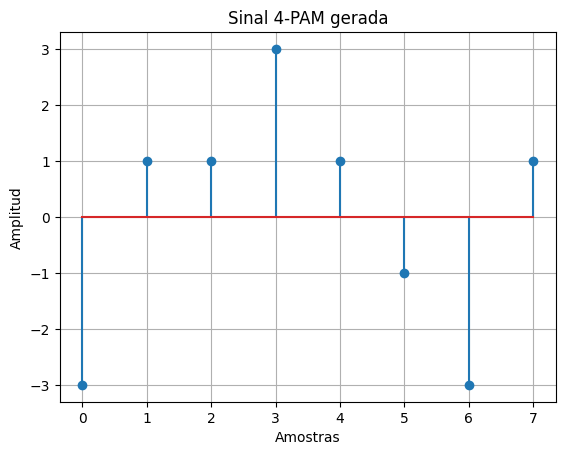

In [41]:
import numpy as np
import matplotlib.pyplot as plt


def generate_4pam_signal(bits):
    #Mapeamento bit a símbolo 4-PAM
    symbol_map = {'00': -3, '01': -1, '10': 1, '11': 3}
    symbols=np.array([])
    # Converter bits em símbolos
    for i in range(0, len(bits), 2):
      b = bits[i:i+2]
      #print(b)
      symbol = symbol_map[b]
      #print(symbol)
      symbols = np.append(symbols, symbol)

    return symbols
print(symbols)
# Exemplo de uso
bits = "0010101110010010"  # Exemplo de sequência de bits
symbols = generate_4pam_signal(bits)

plt.stem(symbols, use_line_collection=True)
plt.title("Sinal 4-PAM gerada")
plt.xlabel("Amostras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

Demodulação sem ruído

In [10]:
def demodulate_4pam_signal(symbols):
    # Mapeamento inverso de símbolos para bits
    symbol_map_inverse = {-3: '00', -1: '01', 1: '10', 3: '11'}

    # Demodulação de símbolos
    bits = ""
    for symbol in symbols:
        # Encontre o símbolo mais próximo
        closest_symbol = min(symbol_map_inverse.keys(), key=lambda x: abs(x - symbol))
        # Converta o símbolo para o bit correspondente
        bits += symbol_map_inverse[closest_symbol]

    return bits

# Exemplo de uso
received_bits = demodulate_4pam_signal(symbols)

print("Bits recibidos después de demodulación:", received_bits)


Bits recibidos después de demodulación: 0010101110010010


Demodulação com ruído

In [42]:
def add_noise(signal, noise_variance):
    noise = np.random.normal(0, np.sqrt(noise_variance), len(signal))
    return signal + noise

def demodulate_4pam_signal(symbols, noise_variance):
    # Mapeamento inverso de símbolos para bits
    symbol_map_inverse = {-3: '00', -1: '01', 1: '10', 3: '11'}

    # Adicionando ruído aos símbolos
    symbols_noisy = add_noise(symbols, noise_variance)

    # Demodulação de símbolos
    bits = ""
    for symbol in symbols_noisy:
        # Encontre o símbolo mais próximo na ausência de ruído
        closest_symbol = min(symbol_map_inverse.keys(), key=lambda x: abs(x - symbol))
        # Converta o símbolo para o bit correspondente
        bits += symbol_map_inverse[closest_symbol]

    return bits

# Exemplo de uso
noise_variance = 0.5  # Variação de ruído
received_bits = demodulate_4pam_signal(symbols, noise_variance)

print("Bits recibidos después de demodulación con ruido:", received_bits)


Bits recibidos después de demodulación con ruido: 0010101110010010
